#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [25]:

import warnings
warnings.filterwarnings('ignore')

# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [8]:
#卷積層1

In [11]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0706 22:54:52.054816 4576732608 deprecation_wrapper.py:119] From /Users/bkang/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3454: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

W0706 22:54:57.731439 4576732608 deprecation.py:506] From /Users/bkang/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2990: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

W0706 22:54:59.960838 4576732608 deprecation.py:506] From /Users/bkang/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1255: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

W0706 23:02:25.962759 4576732608 deprecation_wrapper.py:119] From /Users/bkang/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:949: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0706 23:02:25.967401 4576732608 deprecation.py:506] From /Users/bkang/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:671: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0706 23:02:26.018472 4576732608 deprecation_wrapper.py:119] From /Users/bkang/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:936: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 177s 5ms/step - loss: 0.0901 - acc: 0.1013 - val_loss: 0.0900 - val_acc: 0.0999
Epoch 2/12
37500/37500 [==============================] - 141s 4ms/step - loss: 0.0900 - acc: 0.1006 - val_loss: 0.0899 - val_acc: 0.1166
Epoch 3/12
37500/37500 [==============================] - 134s 4ms/step - loss: 0.0900 - acc: 0.1068 - val_loss: 0.0899 - val_acc: 0.1304
Epoch 4/12
37500/37500 [==============================] - 130s 3ms/step - loss: 0.0899 - acc: 0.1072 - val_loss: 0.0898 - val_acc: 0.1316
Epoch 5/12
37500/37500 [==============================] - 129s 3ms/step - loss: 0.0899 - acc: 0.1080 - val_loss: 0.0898 - val_acc: 0.1337
Epoch 6/12
37500/37500 [==============================] - 129s 3ms/step - loss: 0.0898 - acc: 0.1131 - val_loss: 0.0898 - val_acc: 0.1354
Epoch 7/12
37500/37500 [==============================] - 129s 3ms/step - loss: 0.0898 - acc: 0.1160 - val_loss: 0.0897 - 

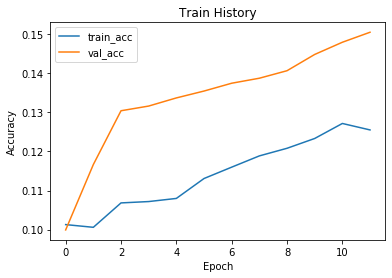

In [24]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

show_train_history('acc','val_acc')

W0706 23:55:13.433216 4576732608 deprecation.py:323] From /Users/bkang/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 138s 4ms/step - loss: 0.3221 - acc: 0.9000 - val_loss: 0.3210 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 134s 4ms/step - loss: 0.3202 - acc: 0.9000 - val_loss: 0.3189 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 130s 3ms/step - loss: 0.3177 - acc: 0.9000 - val_loss: 0.3158 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 129s 3ms/step - loss: 0.3138 - acc: 0.9000 - val_loss: 0.3114 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 131s 3ms/step - loss: 0.3085 - acc: 0.9000 - val_loss: 0.3053 - val_acc: 0.9000
Epoch 6/12
37500/37500 [==============================] - 428s 11ms/step - loss: 0.3024 - acc: 0.9001 - val_loss: 0.2994 - val_acc: 0.9000
Epoch 7/12
37500/37500 [==============================] - 138s 4ms/step - loss: 0.2973 - acc: 0.9001 - val_loss: 0.2942 -

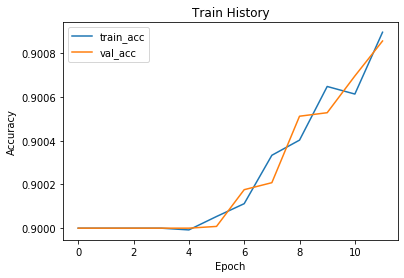

In [27]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

show_train_history('acc','val_acc')